In [1]:
#Project Developed by R.ABHIEJIT KESHAVAN
# Student at Madras institue of Technology (2021-2025)
# Contact: Phone - 9150862235
# Contact: Email - jith1234@icloud.com

# **SENTIMENT ANALYSIS**


---


---
This project is developed to carefully read a sentence and predict the sentiment of the sentence. This model, after interpretting the fed data (input sentence), returns its *tone of voice* (Sentiment).The tone of the sentence sensed by the trained model are:


1.   Very Positive
2.   Slightly Positive
3.   Positive
4.   Neutral
5.   Negative
6.   Slightly Negative
7.   Very Negative

Once it finishes classifying all the revies into the above mentioned tones, it performs various data Analysis.


---






# **Data Set Details**
*The dataset utilized for this project comprises customer reviews extracted from an Amazon product review database. This comprehensive dataset encapsulates diverse perspectives and sentiments expressed by customers across various products available on Amazon's platform. Each entry in the dataset includes details such as product ASINs, brand information, review text, ratings, and other metadata. The reviews cover a wide array of products, ranging from electronics and gadgets to household items and books, reflecting the extensive range of offerings available on Amazon.*





---



---



**//installing xlrd package modules**

*xlrd is a Python package used for reading data from Excel files in the .xls format (Excel 97-2003) and in the older Excel 4.0-7.0 file format. It provides a set of functions and methods to extract data from Excel spreadsheets, including reading cell values, formatting, formulas, and more.*

In [2]:
!pip install xlrd

//importing all the required libraries

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re


//downloading package- vader_lexicon

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

//Coding to get user input sentence and generate its tone (positive, negative, neutral)

//Function to understand the sentiments

In [5]:
def sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    compound_score = sentiment_score['compound']

    # Check for emphasis using regular expressions
    if re.search(r'\b([A-Za-z])\1{2,}\b', text):  # Detect repeated characters (e.g., "YYY")
        if compound_score > 0:
            return 'Very Positive'
        elif compound_score < 0:
            return 'Very Negative'
    elif re.search(r'[A-Z]{2,}', text):  # Detect consecutive uppercase letters (e.g., "BROOO")
        if compound_score > 0:
            return 'Positive'
        elif compound_score < 0:
            return 'Negative'

    # Apply the standard sentiment categories for other cases
    if compound_score >= 0.5:
        return 'Very Positive'
    elif compound_score >= 0.05 and compound_score < 0.5:
        return 'Slightly Positive'
    elif compound_score <= -0.5:
        return 'Very Negative'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    elif compound_score <= -0.05 and compound_score > -0.5:
        return 'Slightly Negative'

    return 'Undefined'

//function to read the dataFrame and add the tone as a new column

In [6]:
def add_sentiment_column(dataframe, text_column):
    sentiments = []
    for index, row in dataframe.iterrows():
        text = row[text_column]
        if isinstance(text, str):  # Check if text is a string
            sentiment = sentiment_analysis(text)
            sentiments.append(sentiment)
        else:
            sentiments.append('Undefined')  # Handle NaN or non-string values
    dataframe['Sentiment'] = sentiments


//Function to read the dataset (excel file) and feed it to the Sentiment detectino function, thereby adding a new column named "Sentiment" that has the tone of the review

In [19]:
excelfile="/content/sample_data_5_rows.xlsx"
data=pd.read_excel(excelfile, sheet_name="Sheet1")
add_sentiment_column(data, "reviews.text")
data.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,Very Positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,Very Positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,Positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,Positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,Positive


# **Making Data Analysis on this detected sentiments**

*//Preprocessing*

In [20]:
#renaming the columnk to nmake it vallue specific
data = data.rename(columns={'Sentiment': 'sentiment.text'})

#converting the values to numerical data type
sentiment_mapping = {
    'Very Positive': 3,
    'Positive': 2,
    'Slightly Positive': 1,
    'Neutral': 0,
    'Slightly Negative': -1,
    'Negative': -2,
    'Very Negative': -3
}
data['sentiment.value'] = data['sentiment.text'].map(sentiment_mapping)
data.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sentiment.text,sentiment.value
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,Very Positive,3.0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,Very Positive,3.0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,Positive,2.0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,Positive,2.0
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,Positive,2.0


# Applying Data Analysis and Data Visualisation

frequency vs sentiment plot

<ipython-input-40-0f74e28b9955>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x="sentiment.value", bins=bin_edges, kde=False, palette="coolwarm")


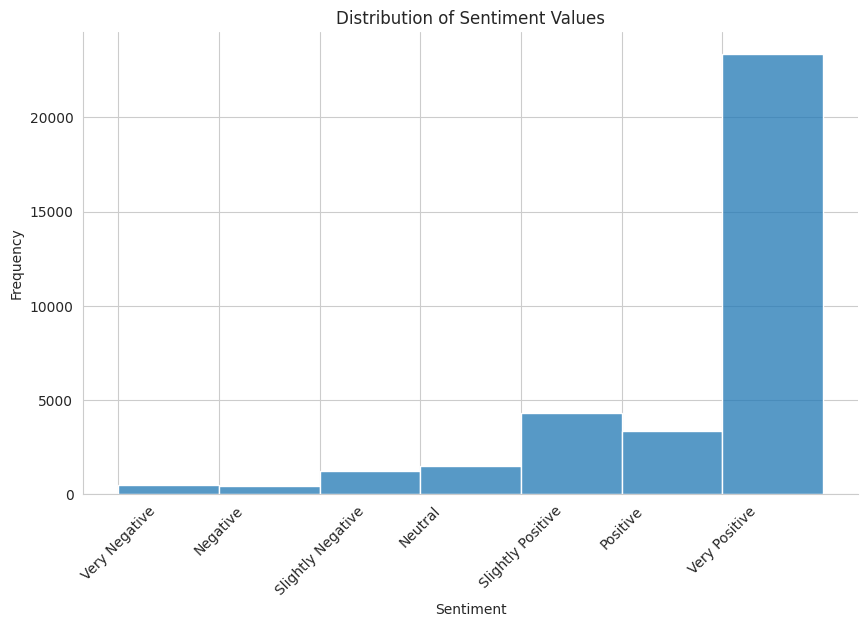

In [40]:
# Define the bin edges and labels
bin_edges = [-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
bin_labels = ['Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive']

# Set the style
sns.set_style("whitegrid")
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="sentiment.value", bins=bin_edges, kde=False, palette="coolwarm")
# Set x-axis labels
plt.xticks(bin_edges[:-1], bin_labels, rotation=45)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Values')

# Remove top and right spines
sns.despine()

# Show plot
plt.show()


Box plot of the sentiment values.



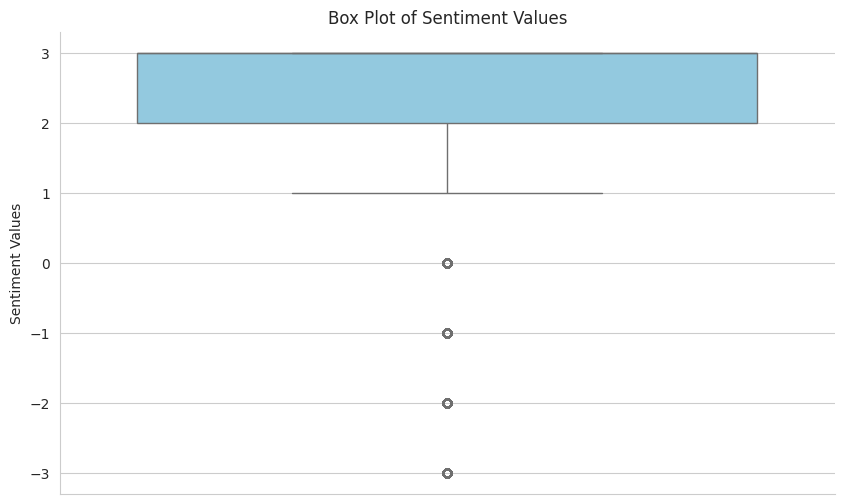

In [39]:
sns.set_style("whitegrid")

# Create the horizontal box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=data["sentiment.value"], color='skyblue')

# Add title and labels
plt.title('Box Plot of Sentiment Values')
plt.ylabel('Sentiment Values')

# Remove top and right spines
sns.despine()

# Show plot
plt.show()


//This indicates the presence of a dominating sentiment- Very positive (3.0) followed by Positive (2.0) sentiments. The outliers are all the negative related reviews and neutral reviews.

Displaying the different types of reviews for each product category manufactured by amazon.

In [31]:
product_sentiment_counts = data.groupby(['name', 'sentiment.value']).size().unstack(fill_value=0)

# Create a new column to indicate overall sentiment (positive, negative, neutral)

# Plot
product_sentiment_counts.head()

sentiment.value,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
name,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",37,28,99,119,383,312,1836
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta",2,2,7,5,19,32,91
"All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers,,",4,4,11,68,65,10,50
"Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,_x000D_\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,",2,1,8,15,31,16,245
"Amazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,_x000D_\nAmazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,",0,0,0,1,1,0,3


//Ploting the counts of each sentiment types for each kind of products sold by the manufacturer Amazon


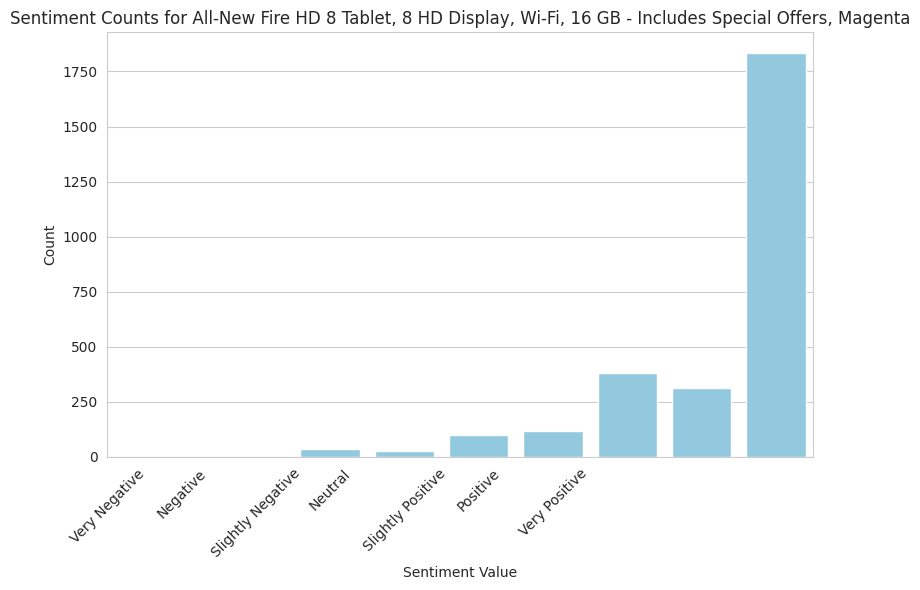

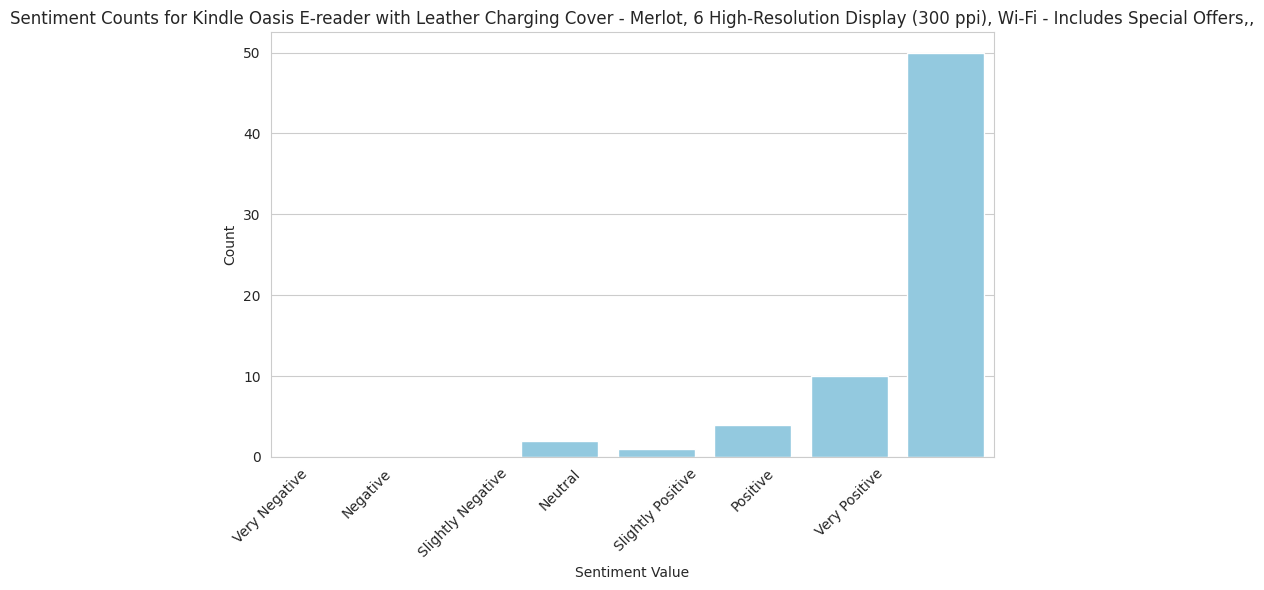

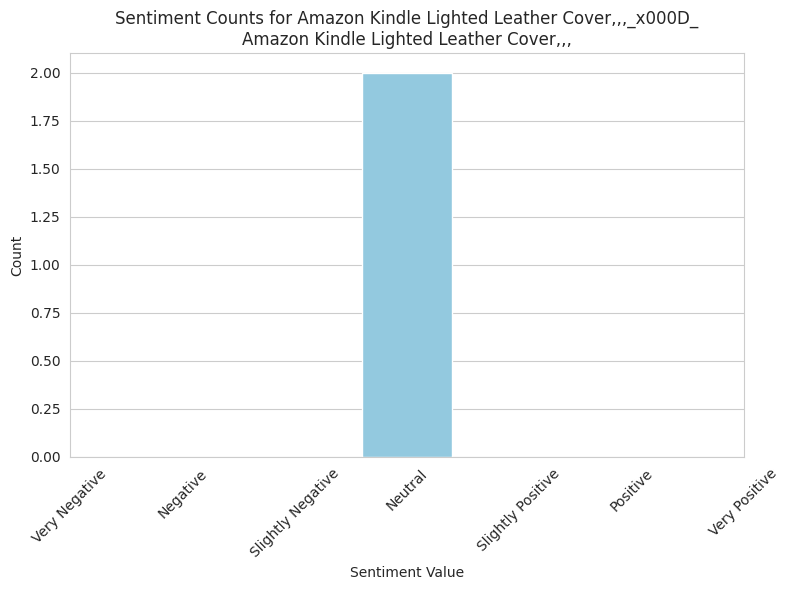

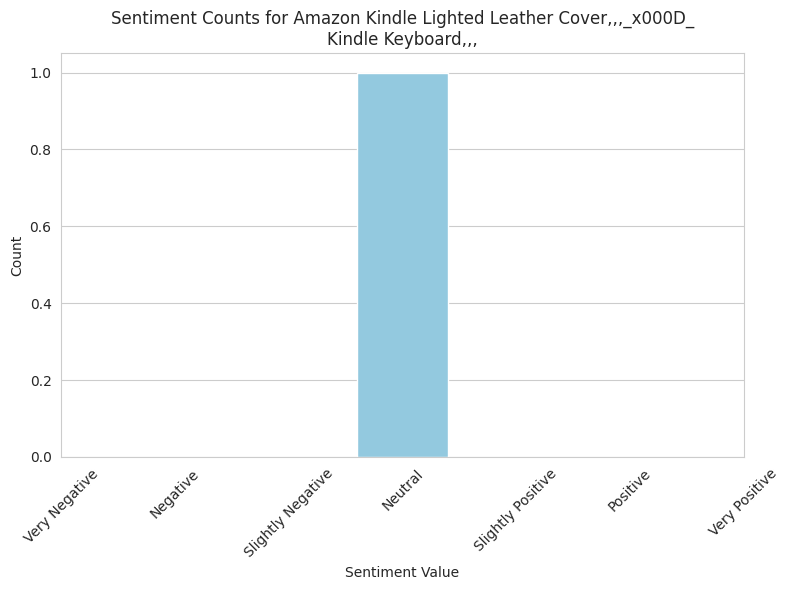

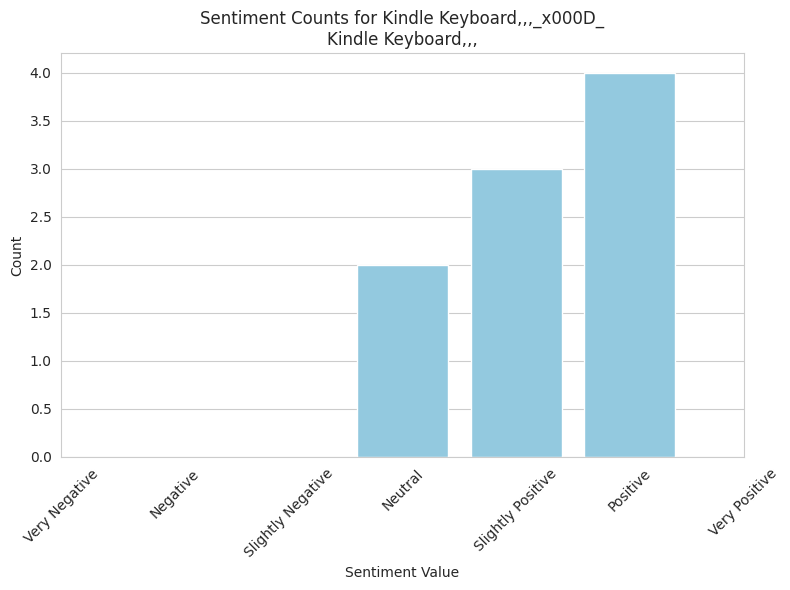

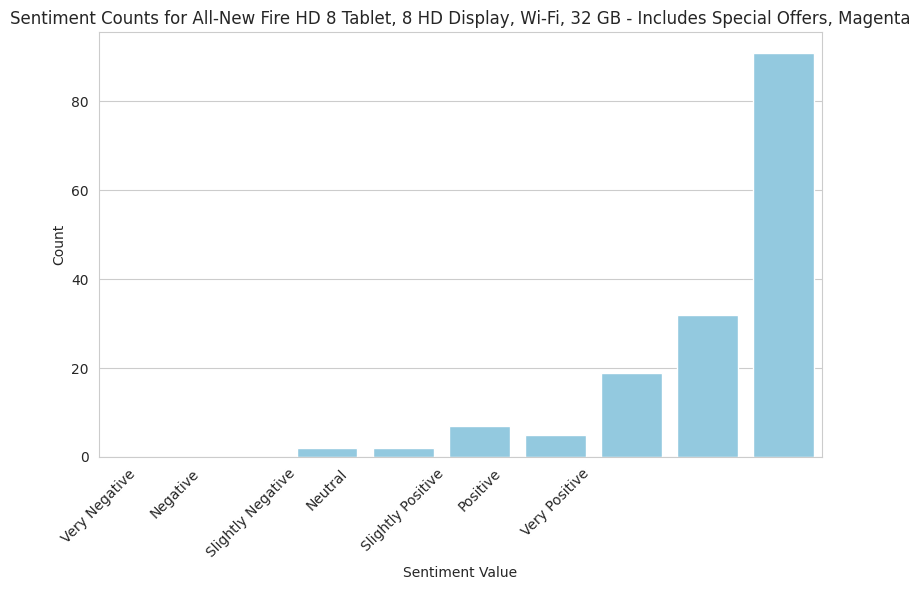

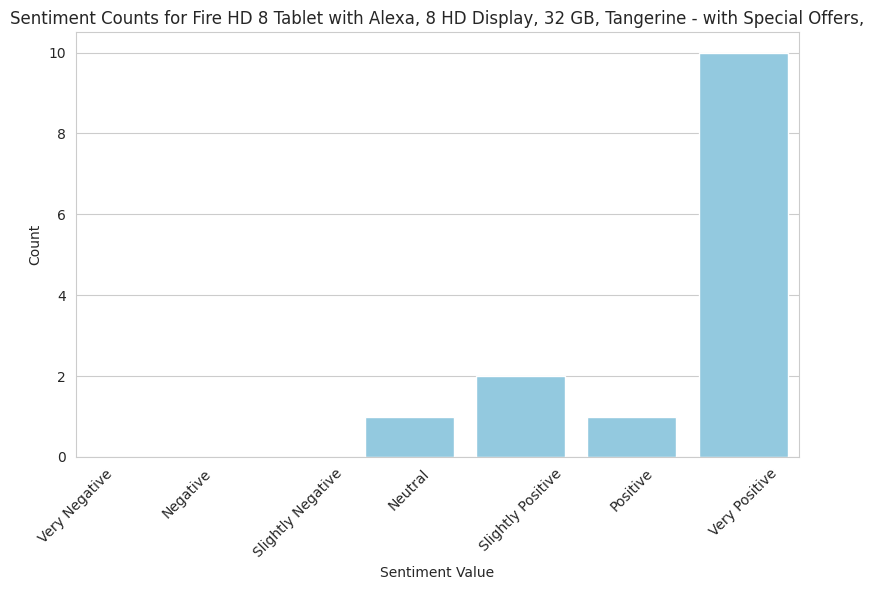

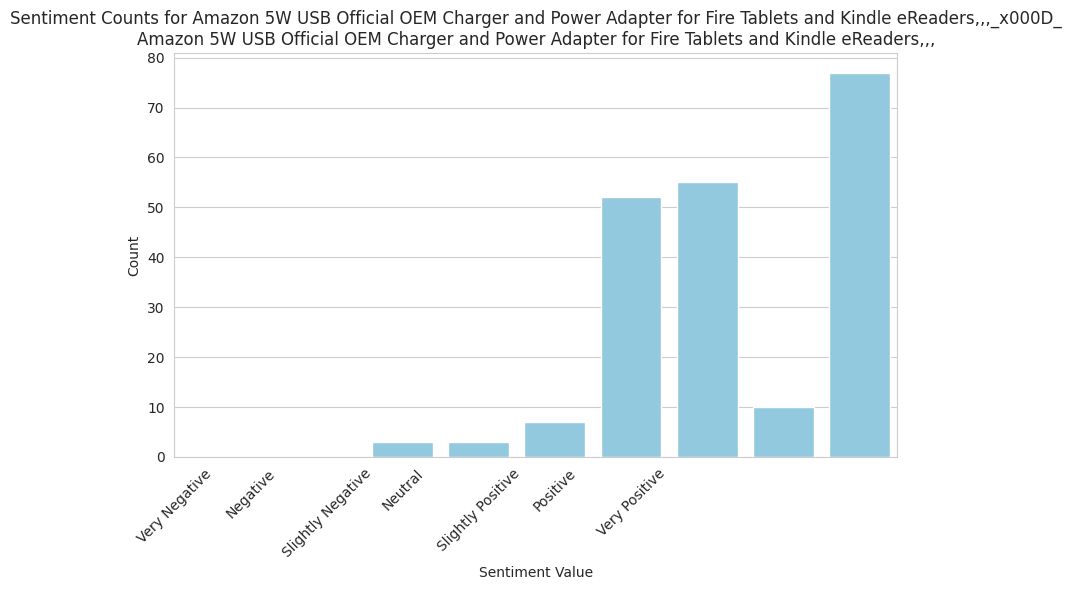

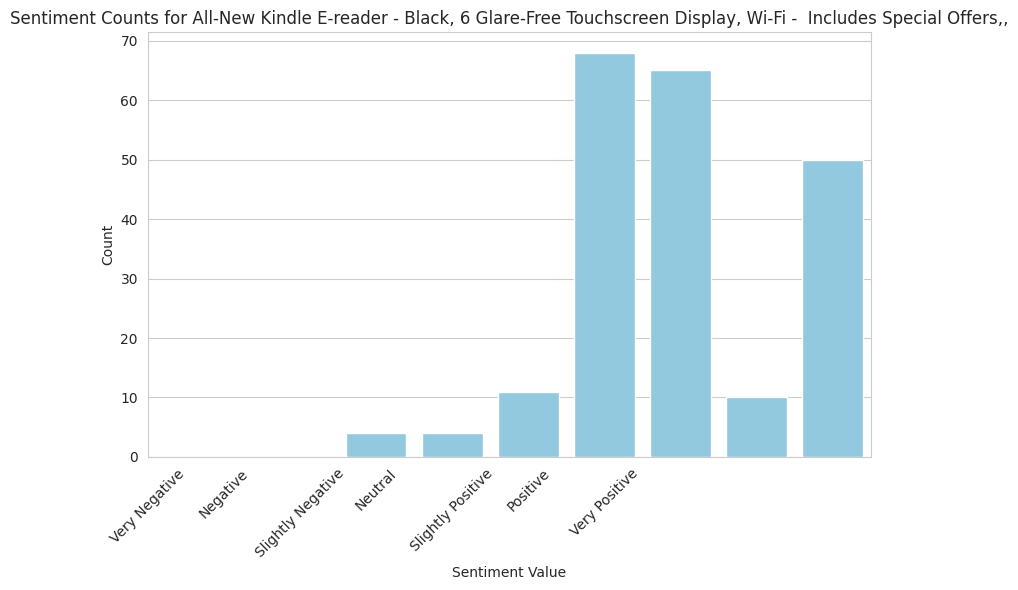

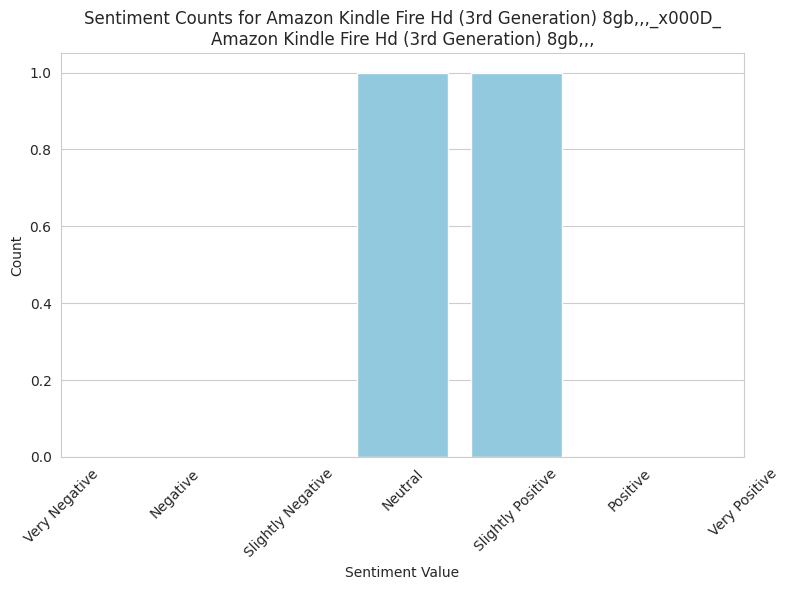

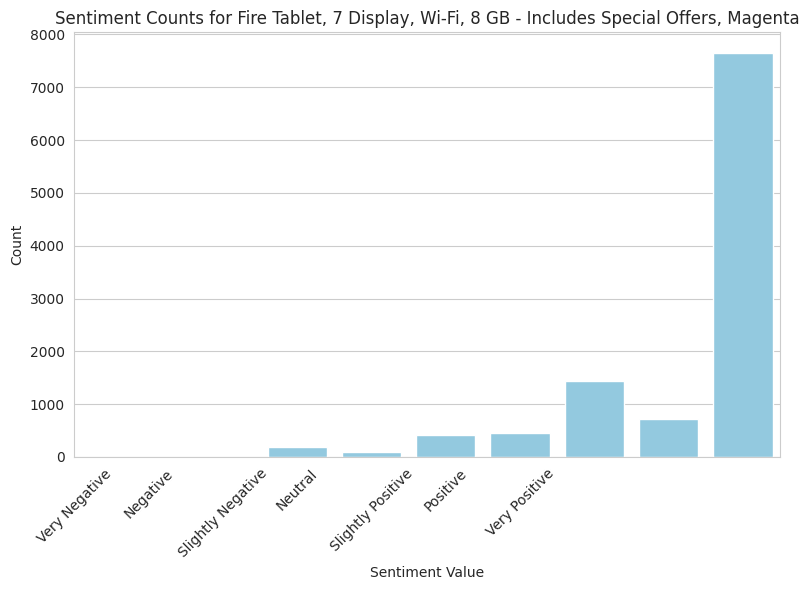

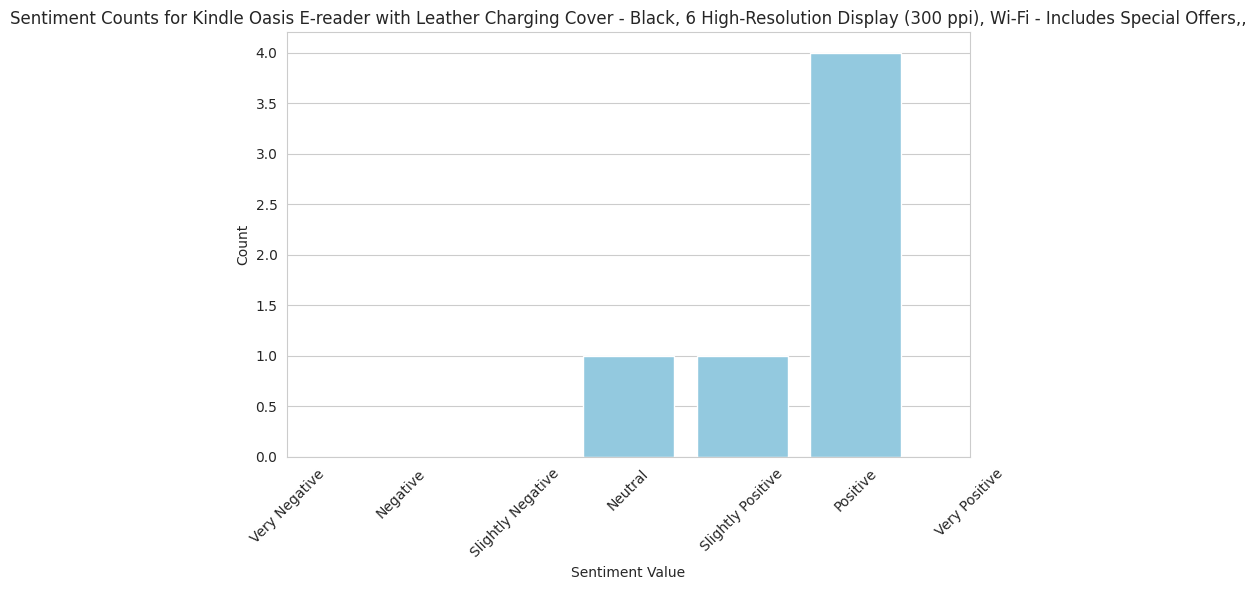

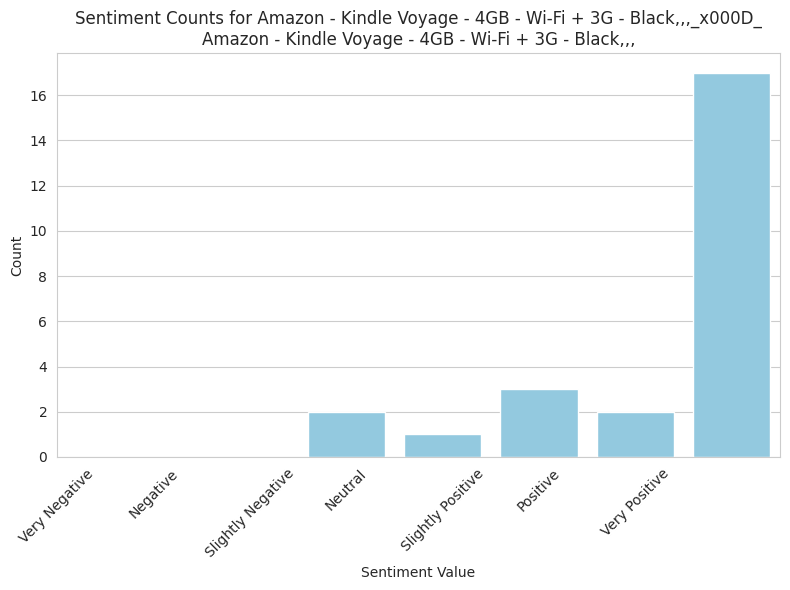

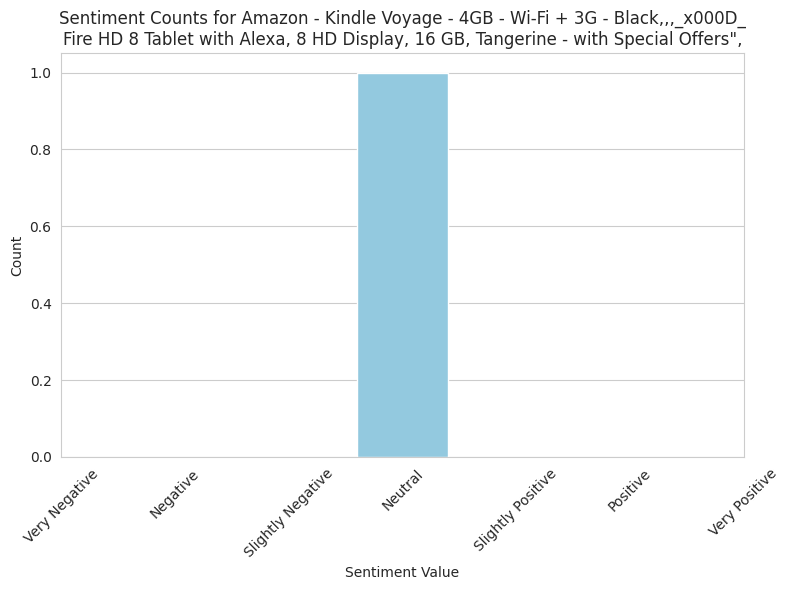

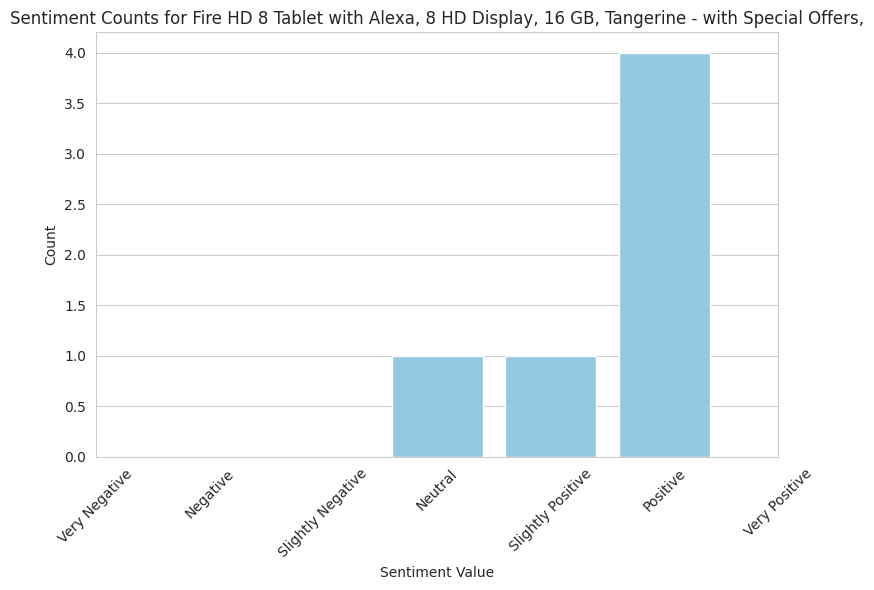

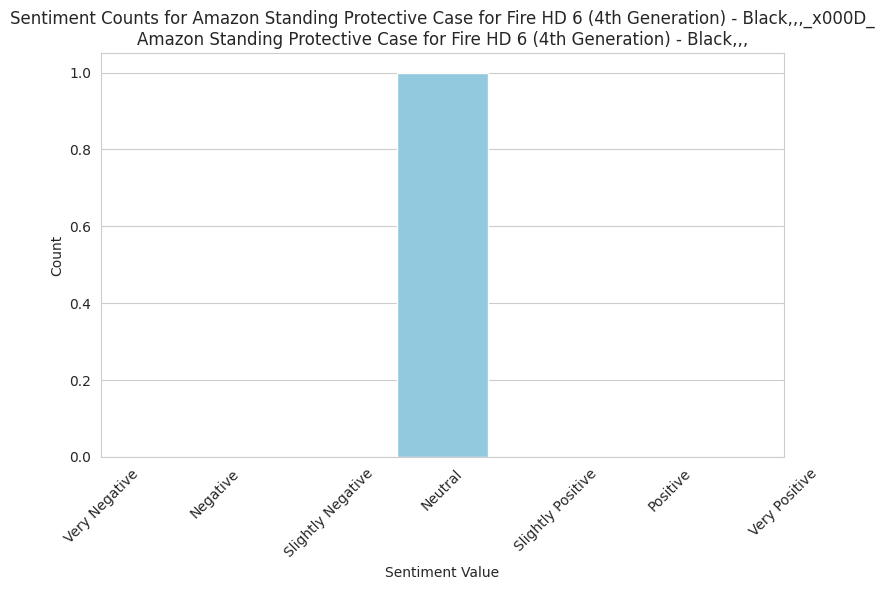

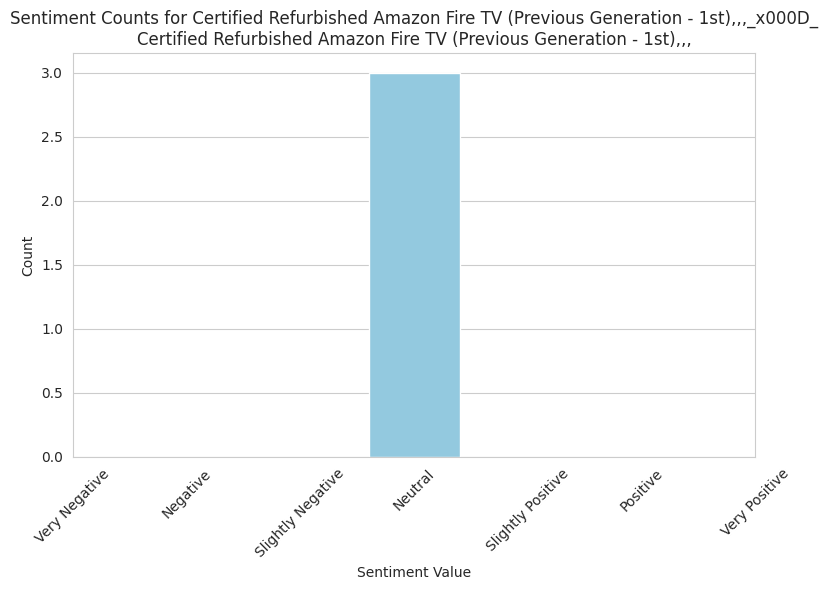

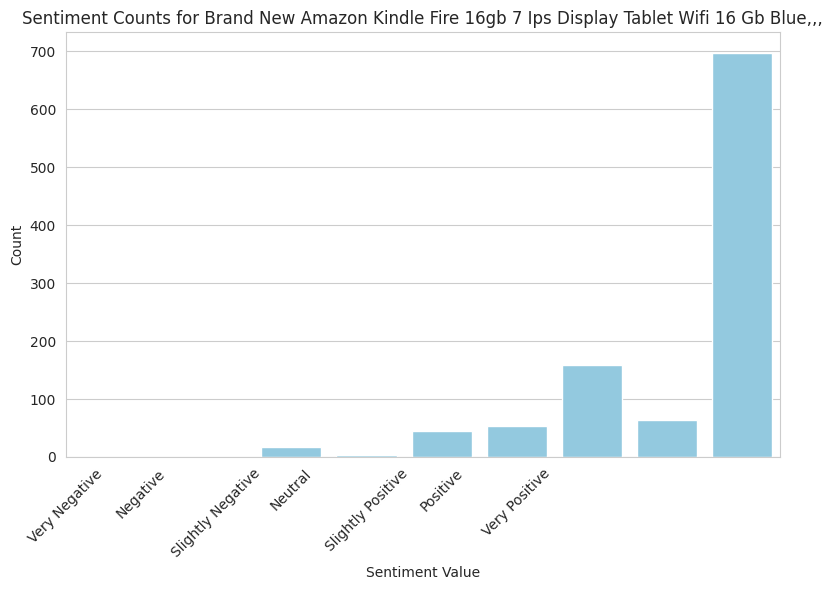

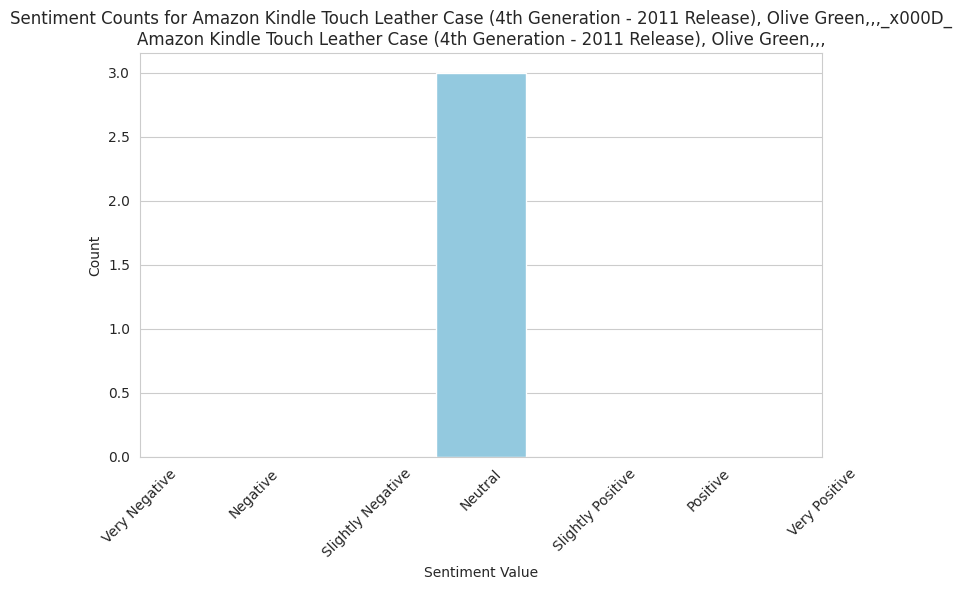

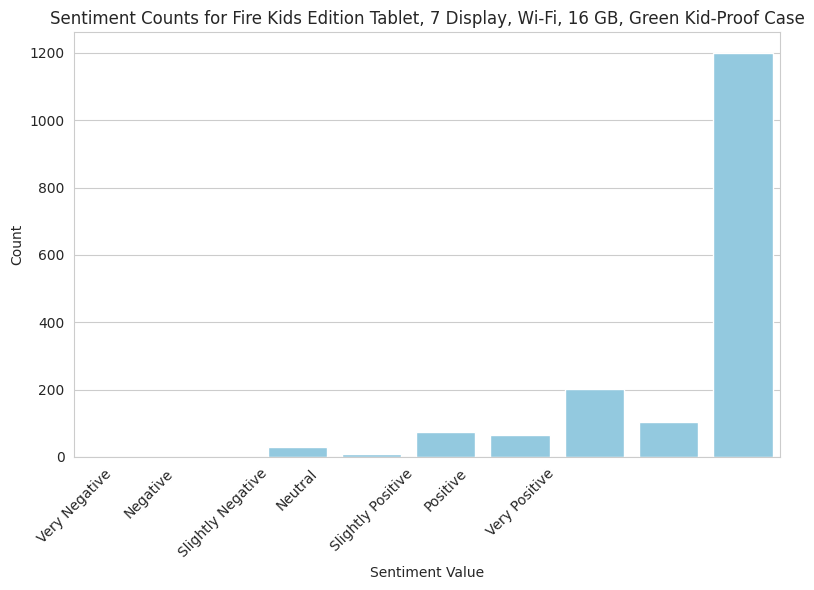

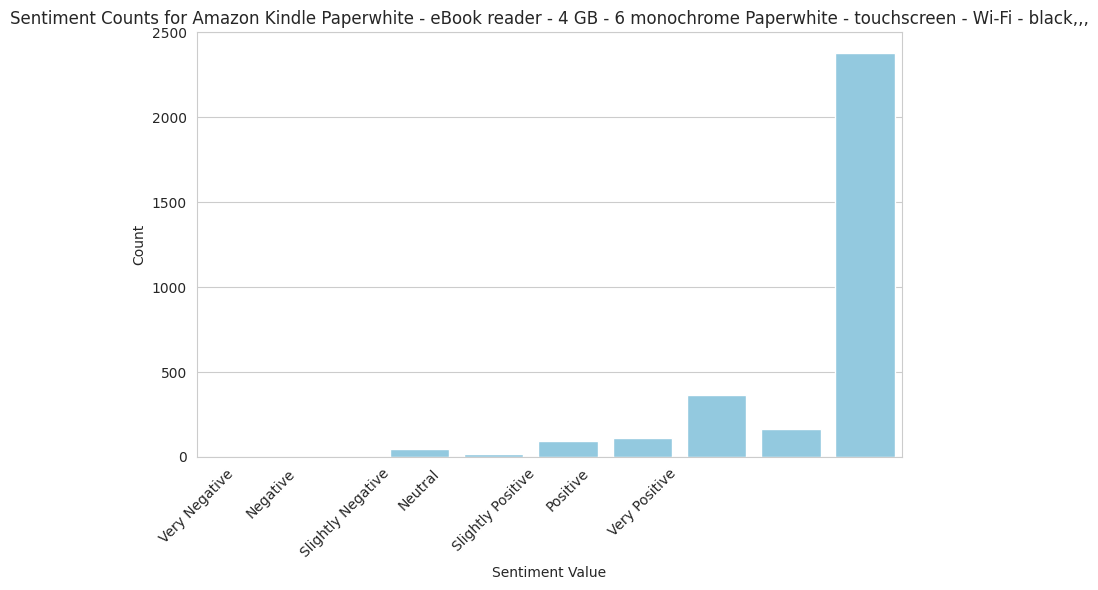

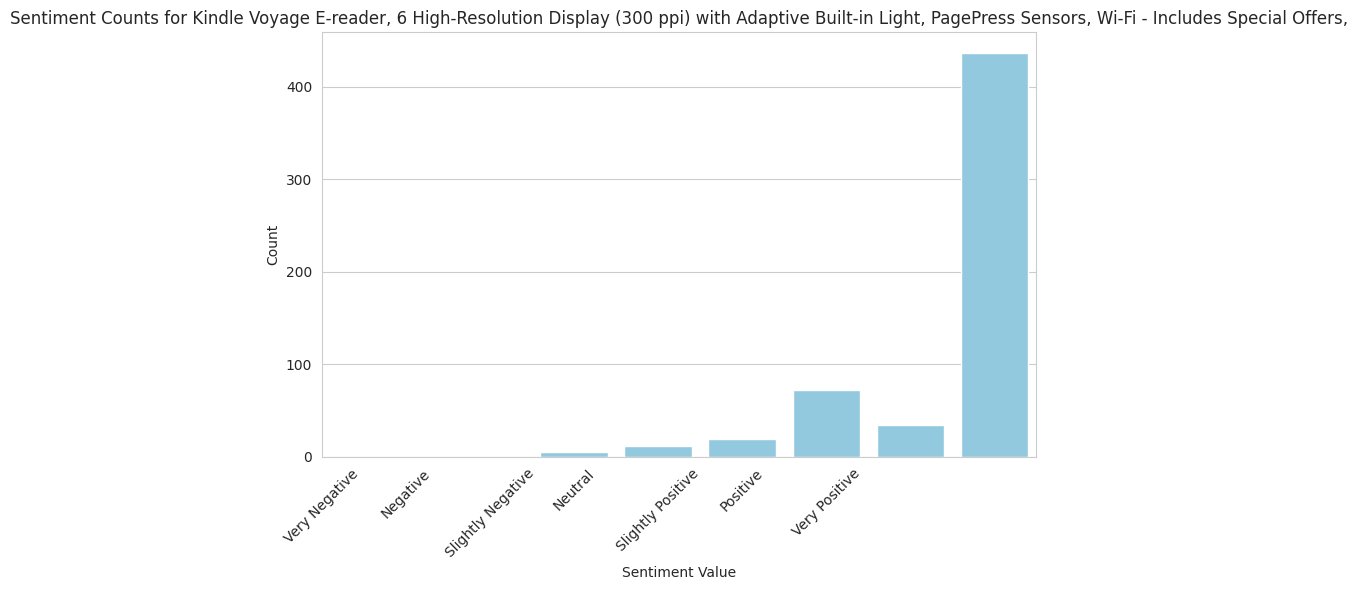

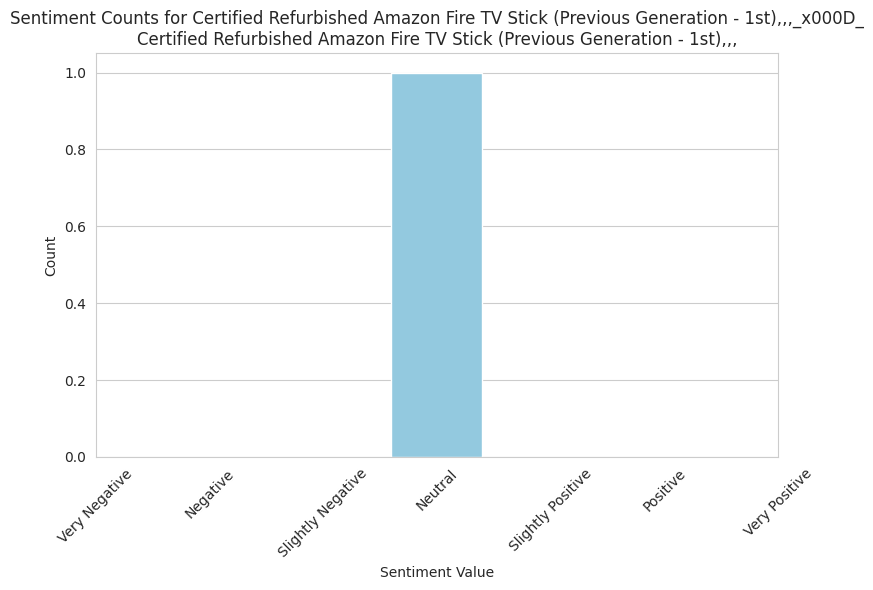

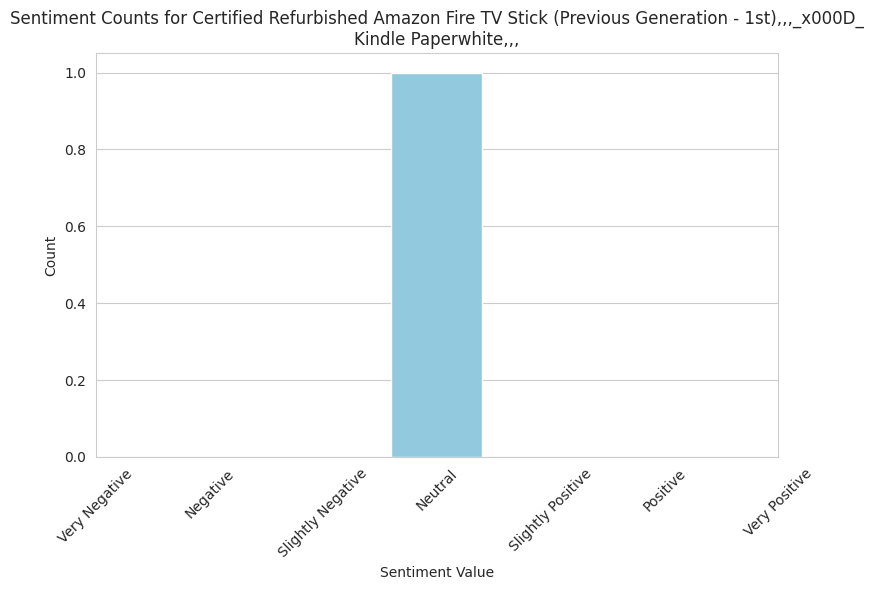

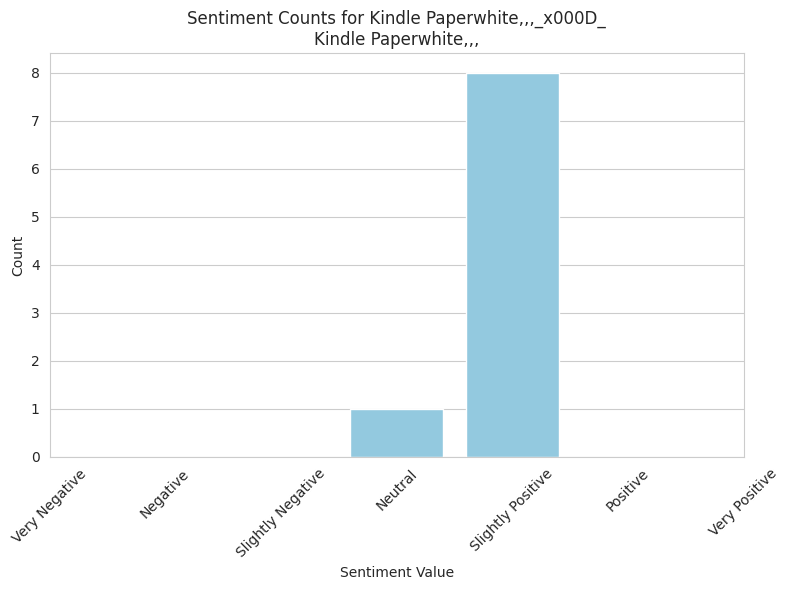

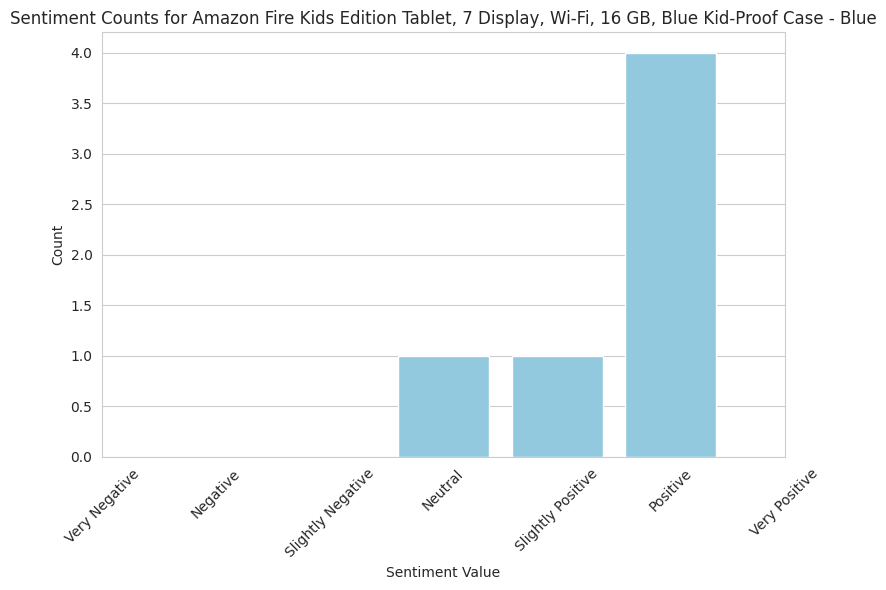

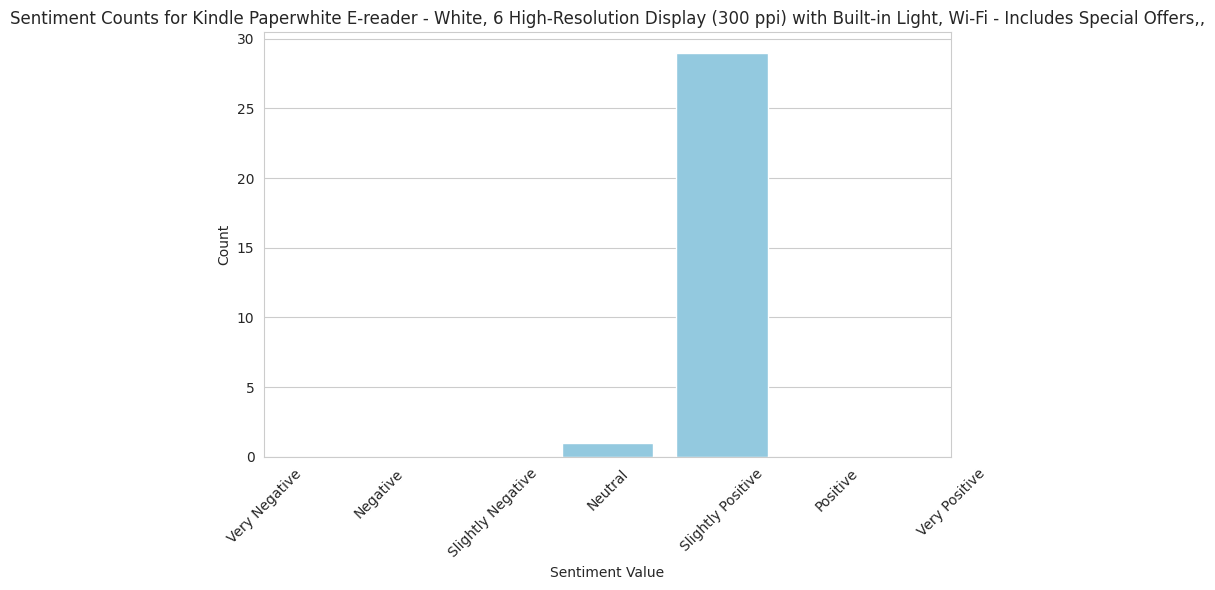

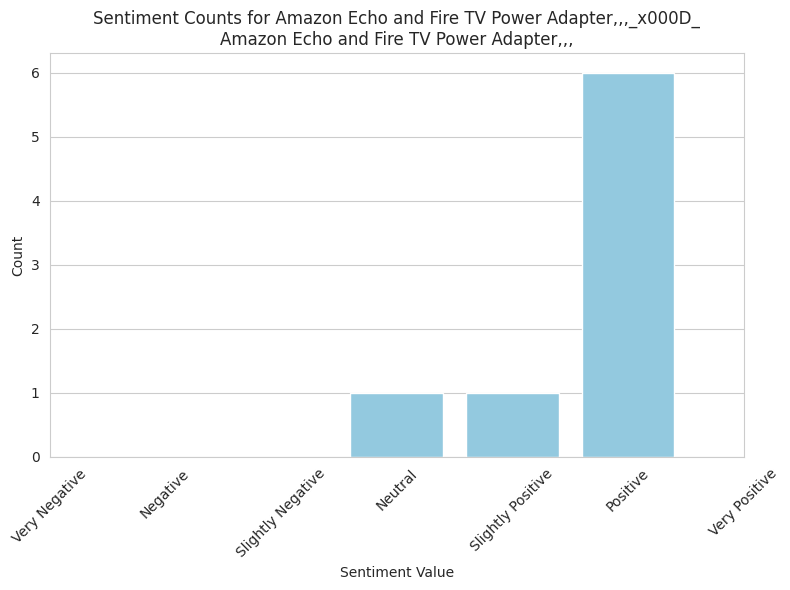

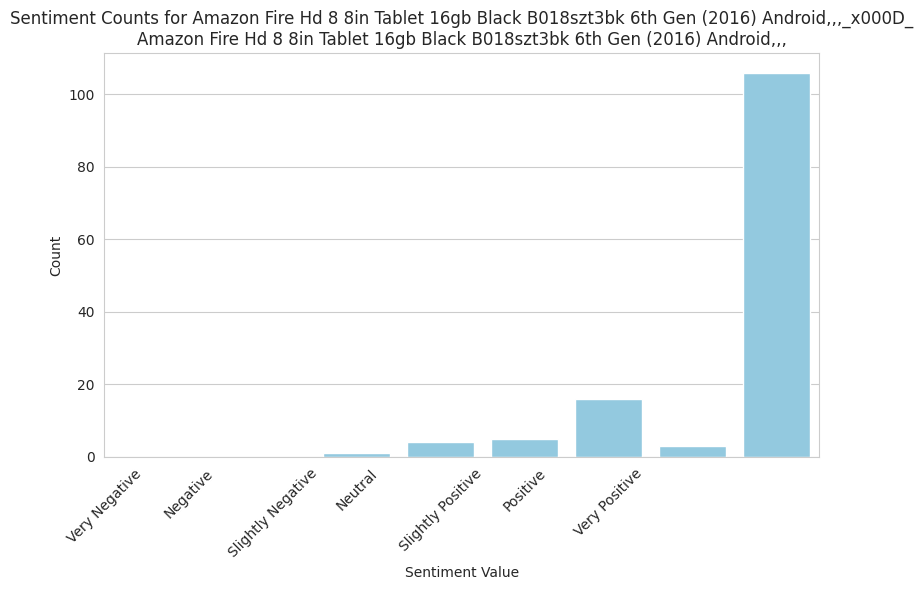

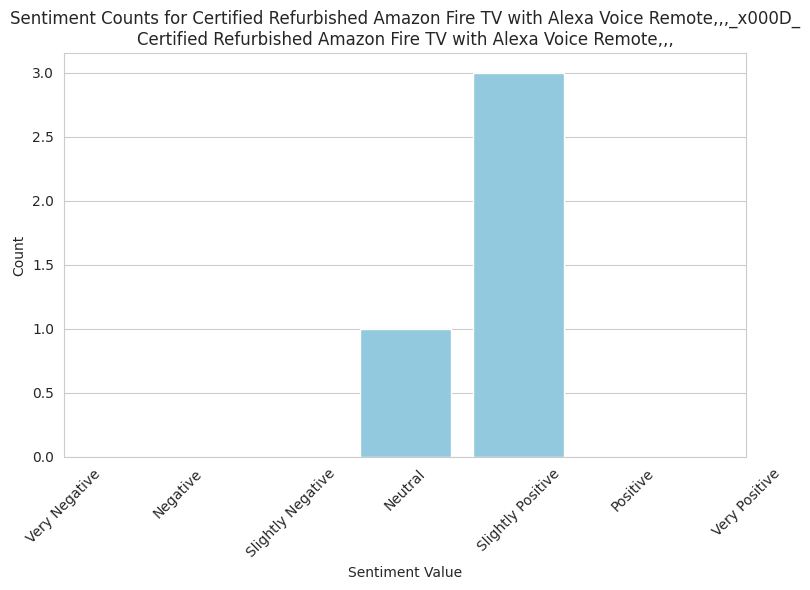

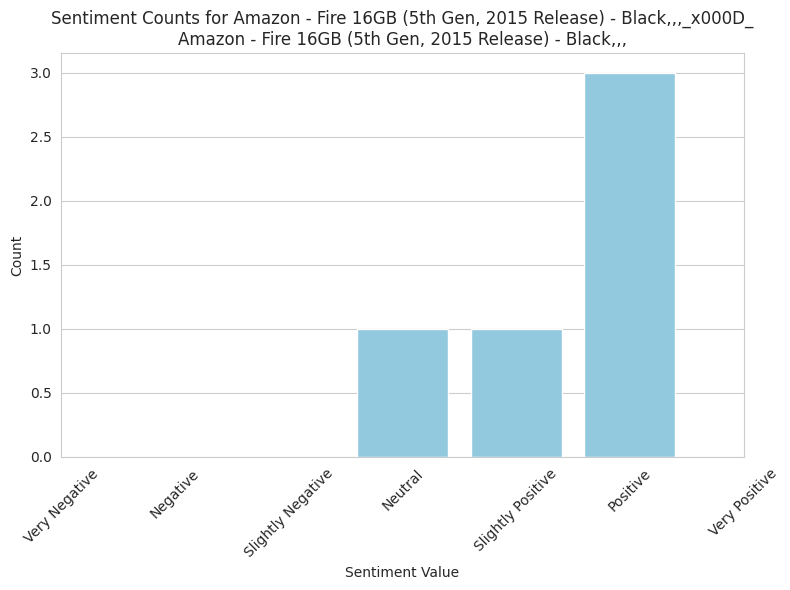

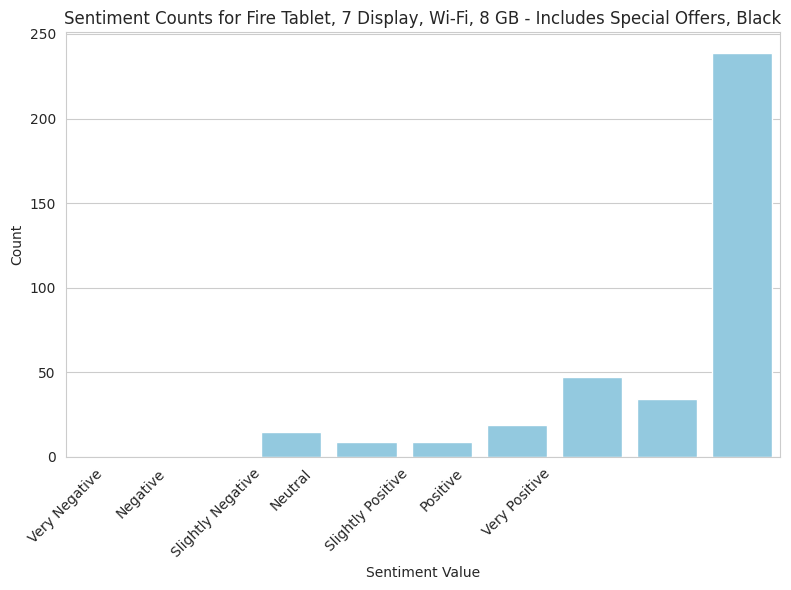

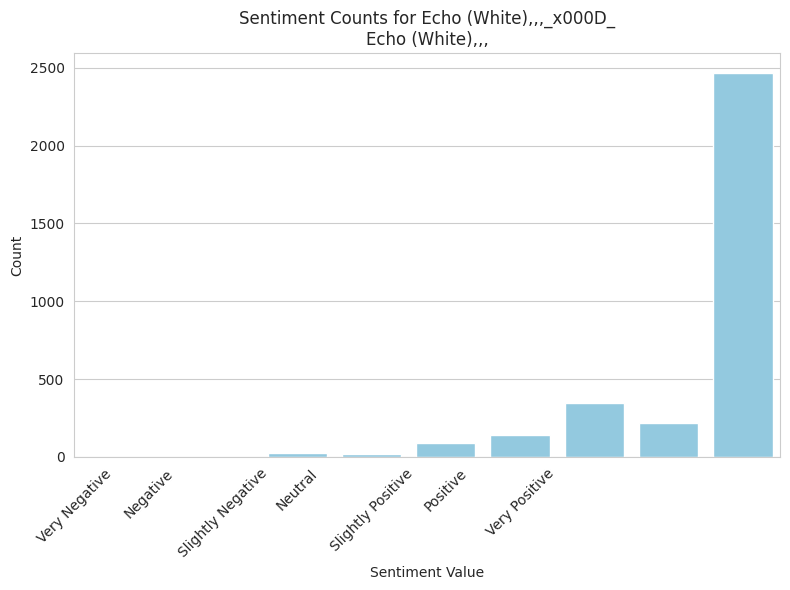

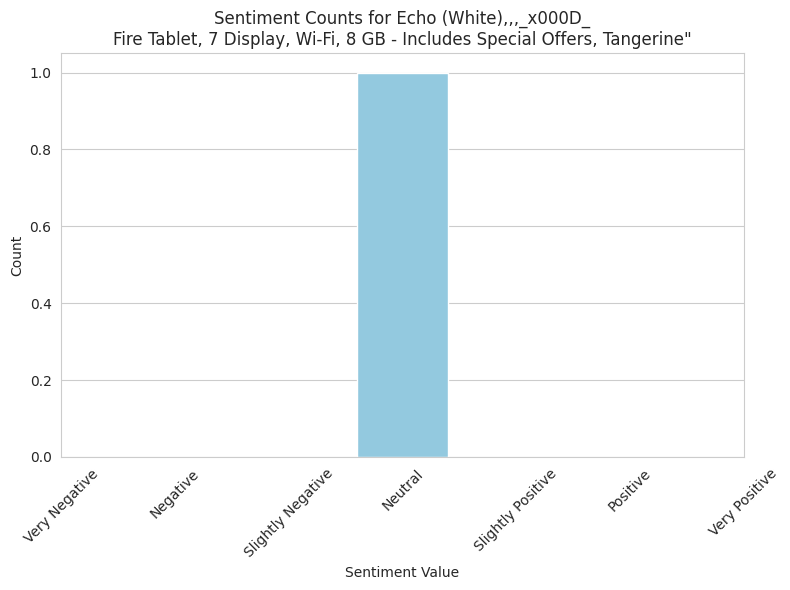

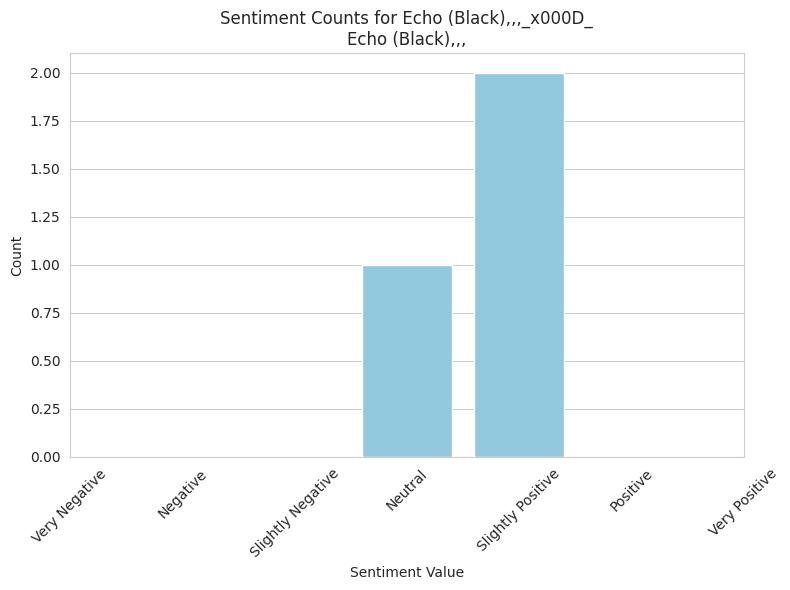

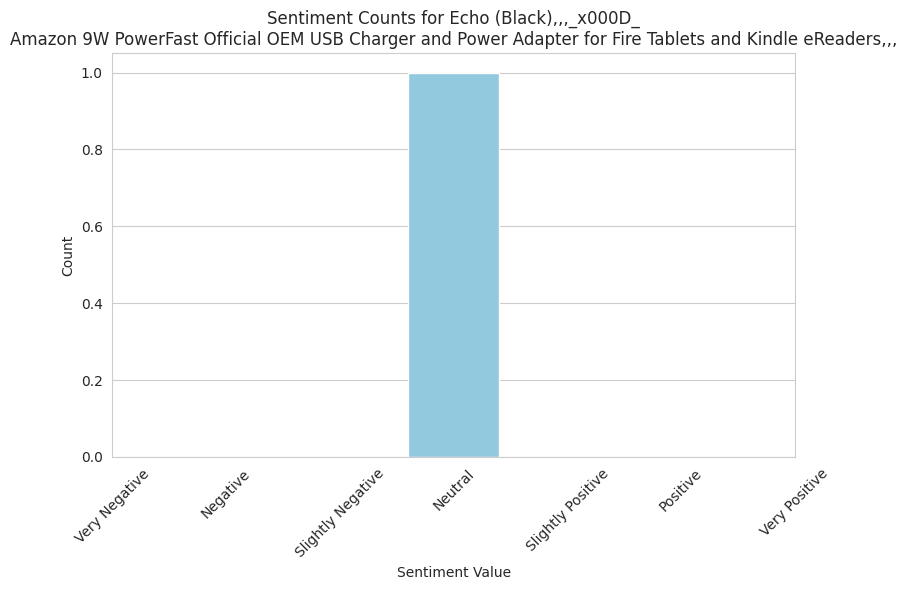

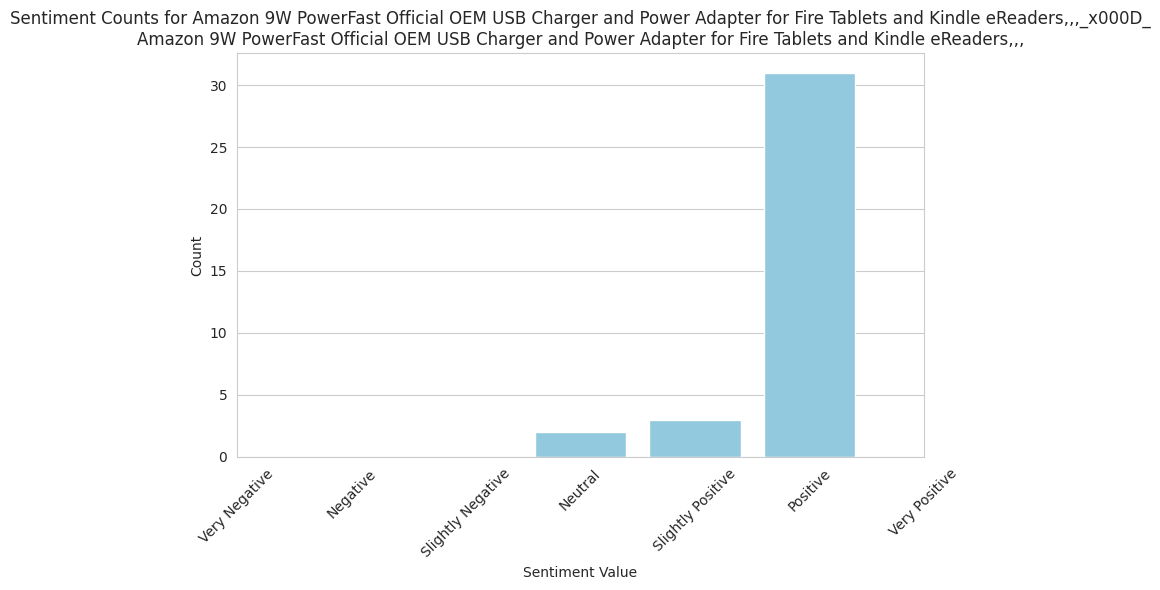

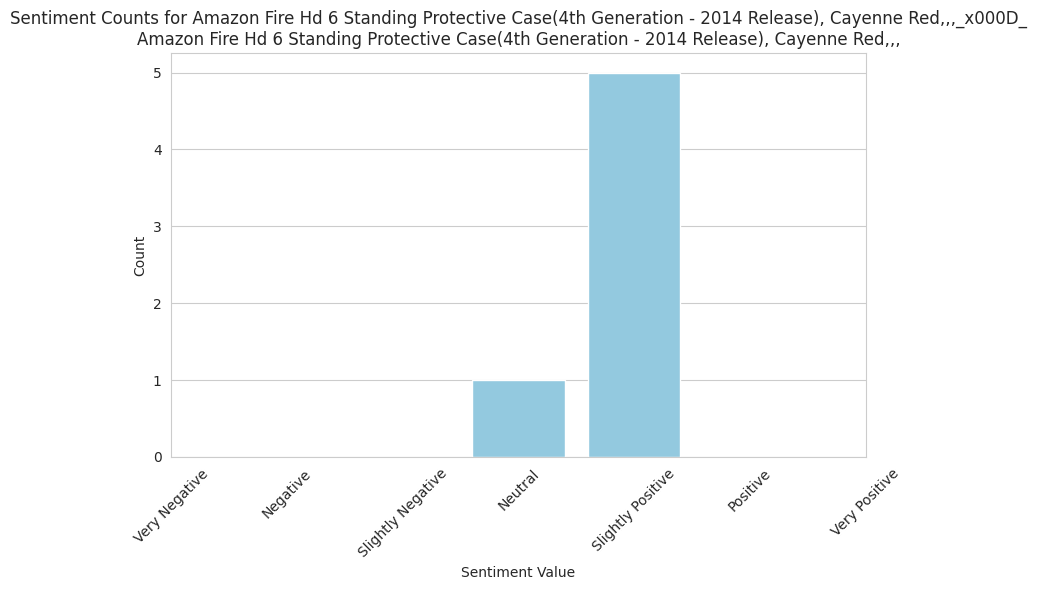

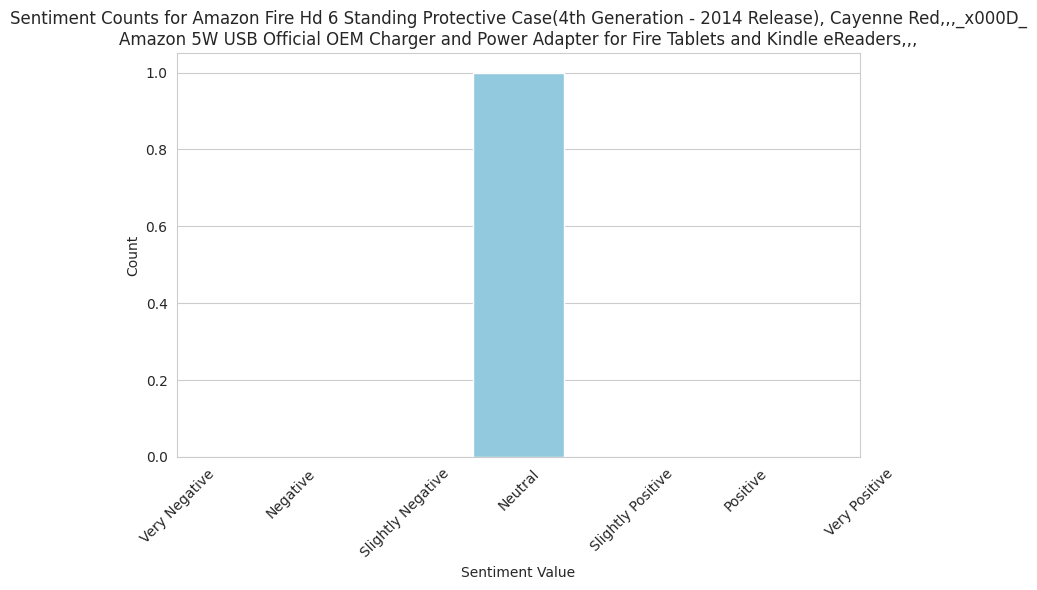

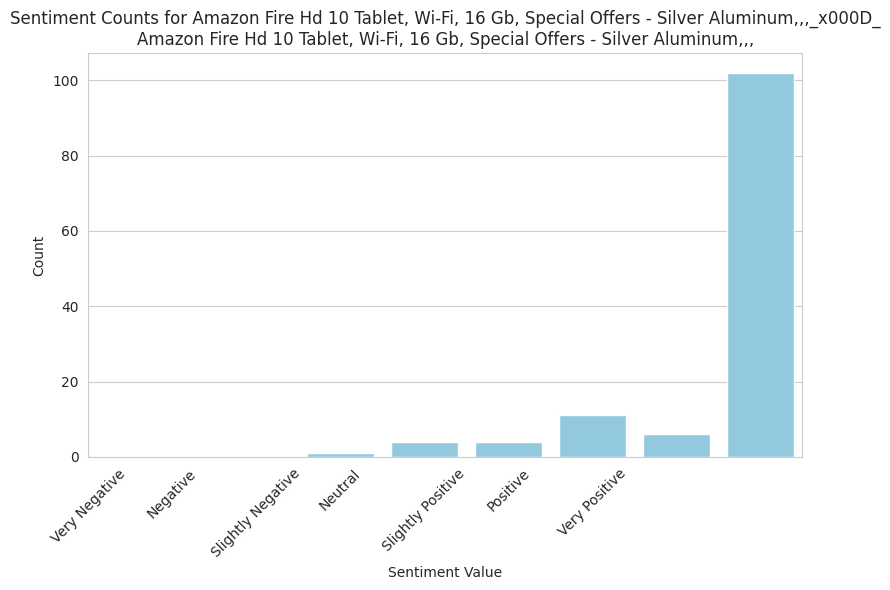

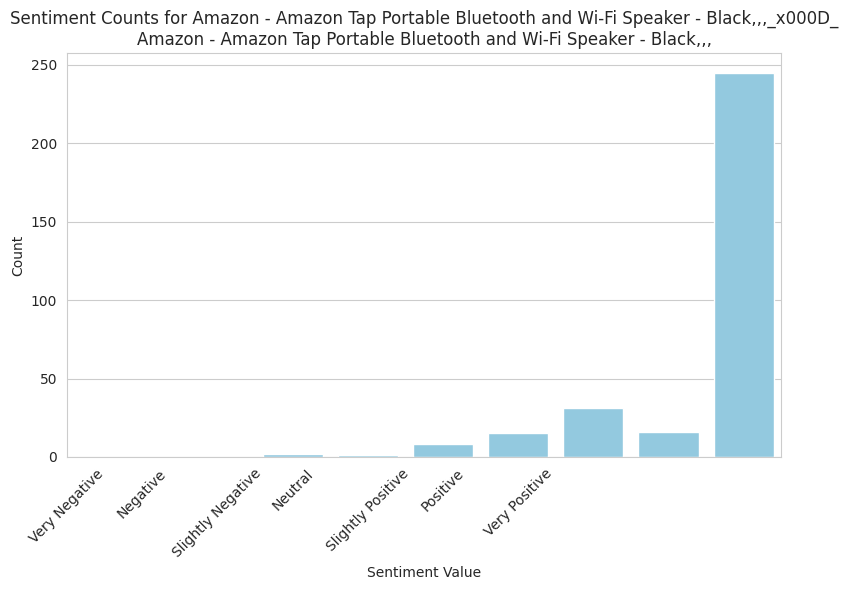

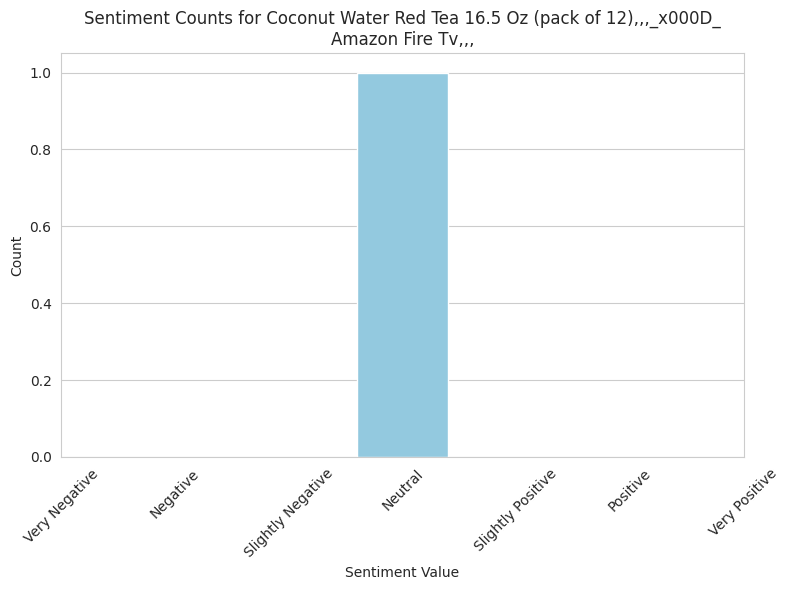

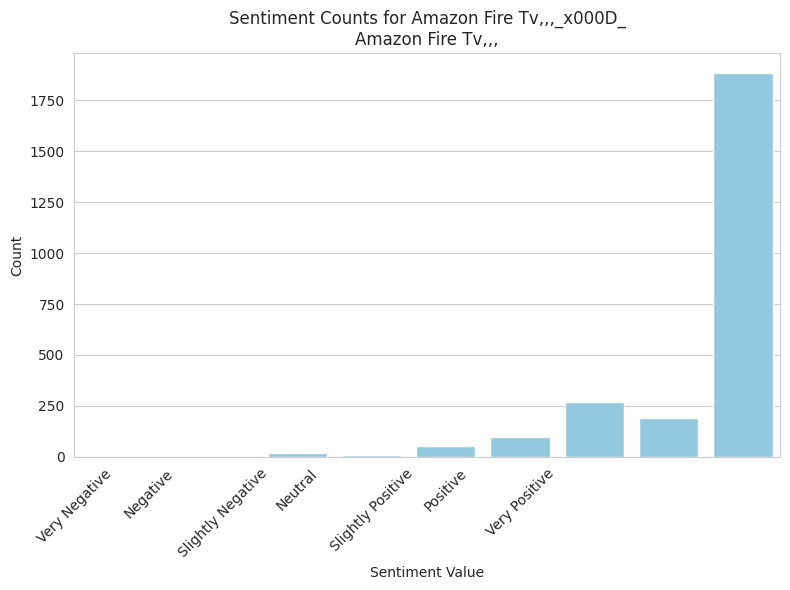

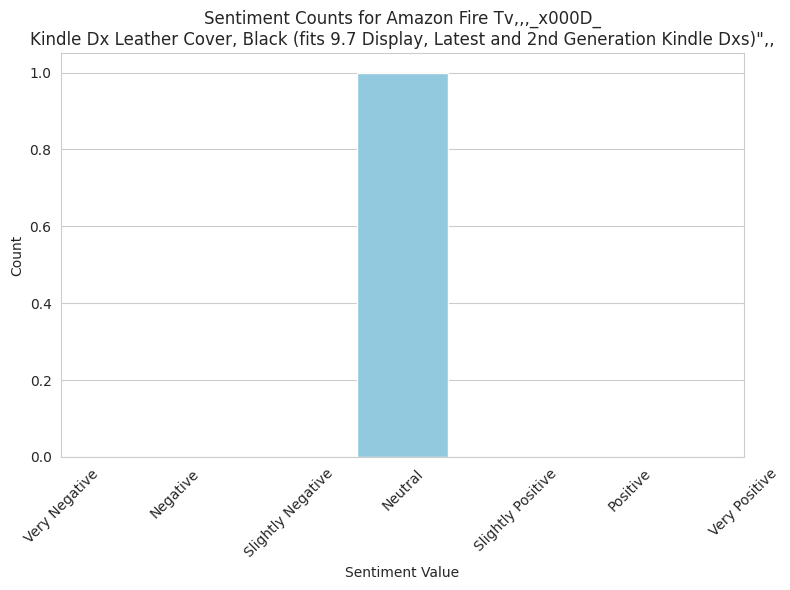

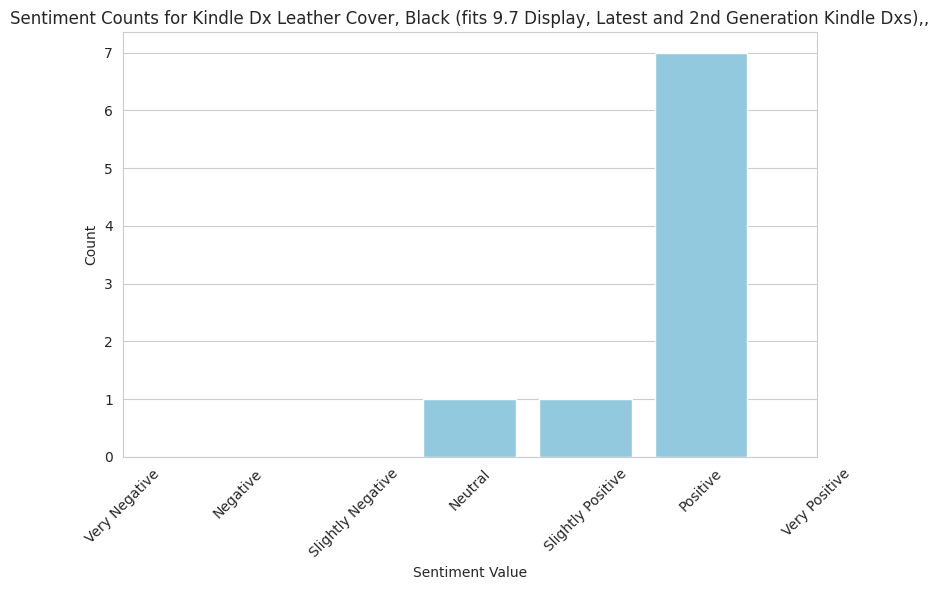

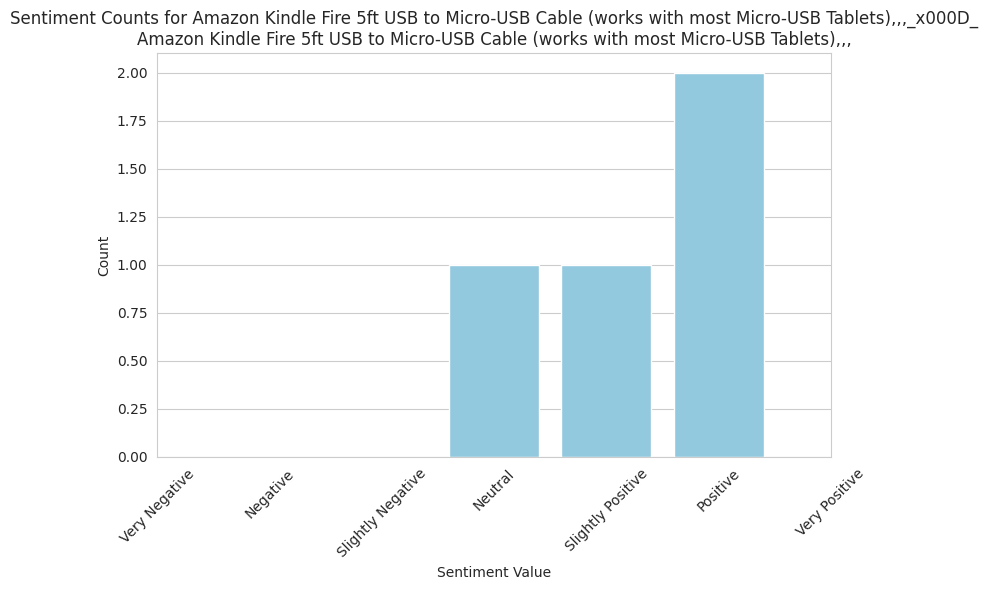

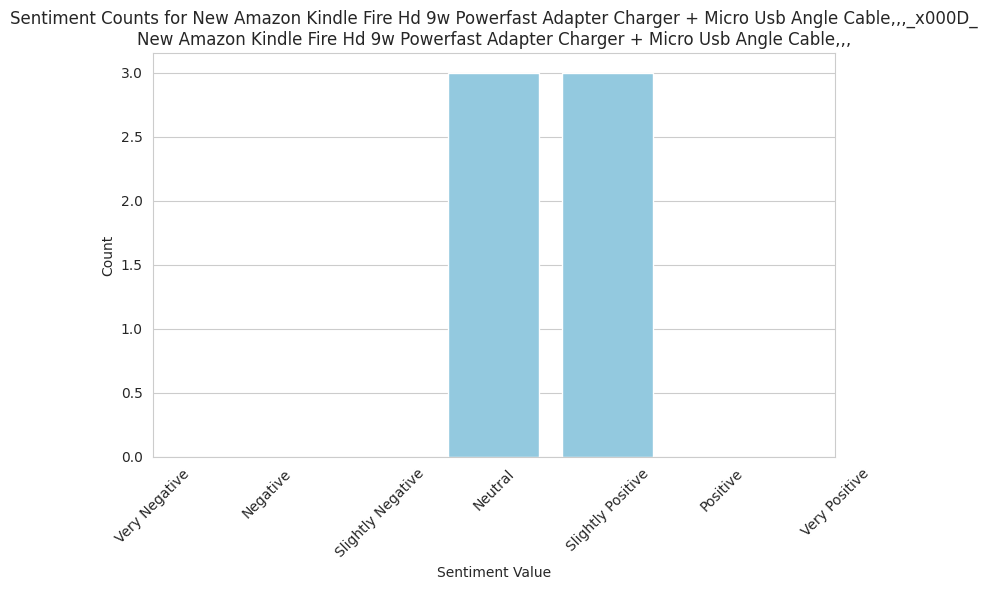

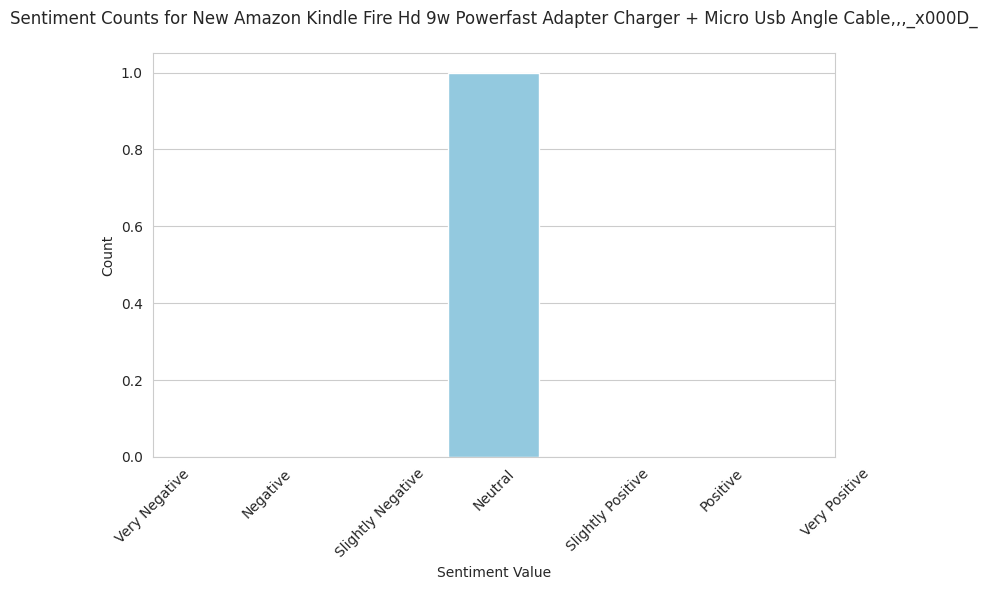

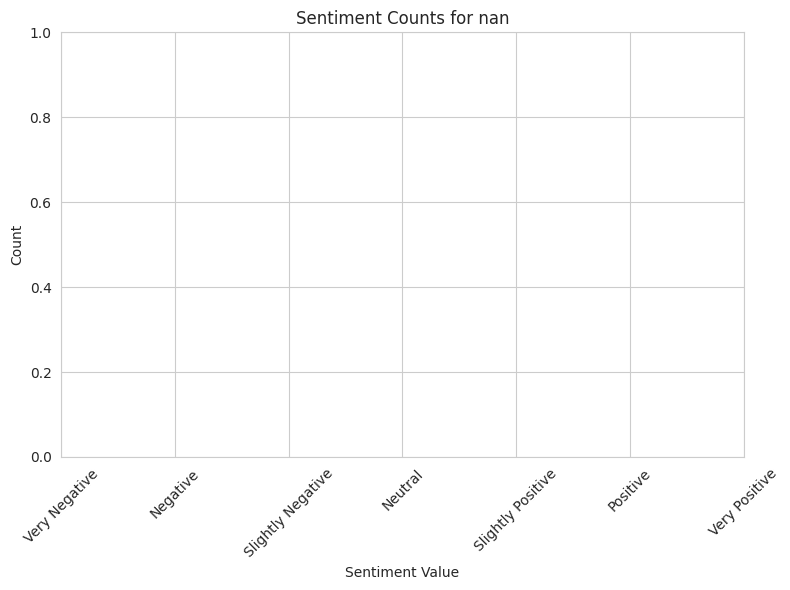

In [44]:
# Define a dictionary to map sentiment values to labels
sentiment_labels = {
    -3.0: 'Very Negative',
    -2.0: 'Negative',
    -1.0: 'Slightly Negative',
    0.0: 'Neutral',
    1.0: 'Slightly Positive',
    2.0: 'Positive',
    3.0: 'Very Positive'
}

# Assuming 'product_sentiment_counts' is your DataFrame containing sentiment counts
# and 'name' is the column containing product names

# Get unique product names
product_names = data['name'].unique()

# Plot count plots for each product name
for product_name in product_names:
    plt.figure(figsize=(8, 6))
    product_data = data[data['name'] == product_name]
    product_sentiment_counts = product_data.groupby('sentiment.value').size().reset_index(name='count')

    sns.barplot(data=product_sentiment_counts, x='sentiment.value', y='count', color='skyblue')
    plt.title(f'Sentiment Counts for {product_name}')
    plt.xlabel('Sentiment Value')
    plt.ylabel('Count')
    plt.xticks(ticks=range(-3, 4), labels=[sentiment_labels[val] for val in range(-3, 4)], rotation=45)
    plt.tight_layout()
    plt.show()


//TO understand all the univariate measures of the data dataframe and come to a conclusion on what are its trends

In [55]:
data.describe()

,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sentiment.value
count,1.0,34066.000000,1.0,34131.000000,34627.000000,0.0,0.0,34658.000000
mean,1.0,0.959373,111372787.0,0.630248,4.584573,NaN,NaN,2.240522
std,NaN,0.197427,NaN,13.215775,0.735653,NaN,NaN,1.331715
min,1.0,0.000000,111372787.0,0.000000,1.000000,NaN,NaN,-3.000000
25%,1.0,1.000000,111372787.0,0.000000,4.000000,NaN,NaN,2.000000
50%,1.0,1.000000,111372787.0,0.000000,5.000000,NaN,NaN,3.000000
75%,1.0,1.000000,111372787.0,0.000000,5.000000,NaN,NaN,3.000000
max,1.0,1.000000,111372787.0,814.000000,5.000000,NaN,NaN,3.000000


//numHelpful Vs all the univariate measures

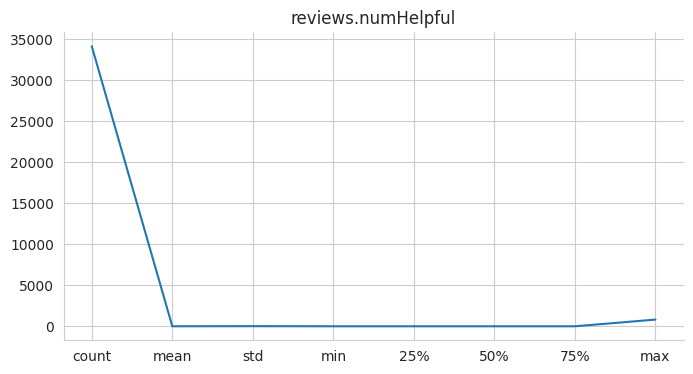

In [53]:
_df_11['reviews.numHelpful'].plot(kind='line', figsize=(8, 4), title='reviews.numHelpful')
plt.gca().spines[['top', 'right']].set_visible(False)



---



---

NOW THIS IS FOR YOU TO GIVE YOUR OWN SENTENCE AND GET THE SENTIMENT FOR IT.😊

Enjoy and have fun, as learning must be fun.


In [58]:
def sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    compound_score = sentiment_score['compound']

    # Check for emphasis using regular expressions
    if re.search(r'\b([A-Za-z])\1{2,}\b', text):  # Detect repeated characters (e.g., "YYY")
        if compound_score > 0:
            return 'Very Positive'
        elif compound_score < 0:
            return 'Very Negative'
    elif re.search(r'[A-Z]{2,}', text):  # Detect consecutive uppercase letters (e.g., "BROOO")
        if compound_score > 0:
            return 'Positive'
        elif compound_score < 0:
            return 'Negative'

    # Apply the standard sentiment categories for other cases
    if compound_score >= 0.5:
        return 'Very Positive'
    elif compound_score >= 0.05 and compound_score < 0.5:
        return 'Slightly Positive'
    elif compound_score <= -0.5:
        return 'Very Negative'
    elif compound_score > -0.05 and compound_score < 0.05:
        return 'Neutral'
    elif compound_score <= -0.05 and compound_score > -0.5:
        return 'Slightly Negative'

    return 'Undefined'

# Main loop
while True:
    # Get input from the user
    user_input = input("Enter your statement: ")

    # Perform sentiment analysis
    sentiment = sentiment_analysis(user_input)
    print("Sentiment:", sentiment)

    # Ask if the user wants to continue
    choice = input("Do you want to continue? (yes/no): ").lower()
    if choice != 'yes':
        break

Enter your statement: Hey, im sad
Sentiment: Slightly Negative
Do you want to continue? (yes/no): yes
Enter your statement: I wanna die now peacefully
Sentiment: Slightly Negative
Do you want to continue? (yes/no): yes
Enter your statement: I really want to die
Sentiment: Very Negative
Do you want to continue? (yes/no): yes
Enter your statement: life is good
Sentiment: Slightly Positive
Do you want to continue? (yes/no): yes
Enter your statement: life is soooo good
Sentiment: Slightly Positive
Do you want to continue? (yes/no): yes
Enter your statement: life is extremely happy
Sentiment: Very Positive
Do you want to continue? (yes/no): how are you?




---



Thanks for going thro the project and i highly appreciate you to explore many new things beyond what i haev done (with my limited knowledge).

Always remember, any project or creation is supreme if its your own even if how mediocre it seems to be.


> "My work might not be soo divine,
well atleast its completely mine"


